#### Importing the Relevant Libraries

In [123]:
# Import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

#### Loading the dataset

In [126]:
df = pd.read_csv(r"C:\Users\hp\Documents\Turbham Tech\merged_diabetes_dataset.csv")
df.head()

,Sex,Age,BMI,HighBP,HighChol,CholCheck,Smoker,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,HeartDiseaseorAttack,Diabetes_binary
0,2.0,70.0,9.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0
1,2.0,60.0,11.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0
2,2.0,50.0,12.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0
3,2.0,42.0,11.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
4,2.0,26.0,13.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0


In [128]:
df.shape

(70843, 13)

In [130]:
df.nunique()

Sex                      3
Age                     55
BMI                     86
HighBP                   2
HighChol                 2
CholCheck                2
Smoker                   2
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
HeartDiseaseorAttack     2
Diabetes_binary          2
dtype: int64

In [132]:
df['Sex'].unique()

array([2., 1., 0.])

In [136]:
df['Sex'].replace(2, df['Sex'].mode()[0], inplace=True)


In [140]:
df.nunique()

Sex                      2
Age                     55
BMI                     86
HighBP                   2
HighChol                 2
CholCheck                2
Smoker                   2
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
HeartDiseaseorAttack     2
Diabetes_binary          2
dtype: int64

In [142]:
# Check the updated DataFrame
print(df[['Sex']].head())


   Sex
0  0.0
1  0.0
2  0.0
3  0.0
4  0.0


In [144]:
## Display the data types of the columns
df.dtypes

Sex                     float64
Age                     float64
BMI                     float64
HighBP                  float64
HighChol                float64
CholCheck               float64
Smoker                  float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
HeartDiseaseorAttack    float64
Diabetes_binary         float64
dtype: object

### Univariate Analysis

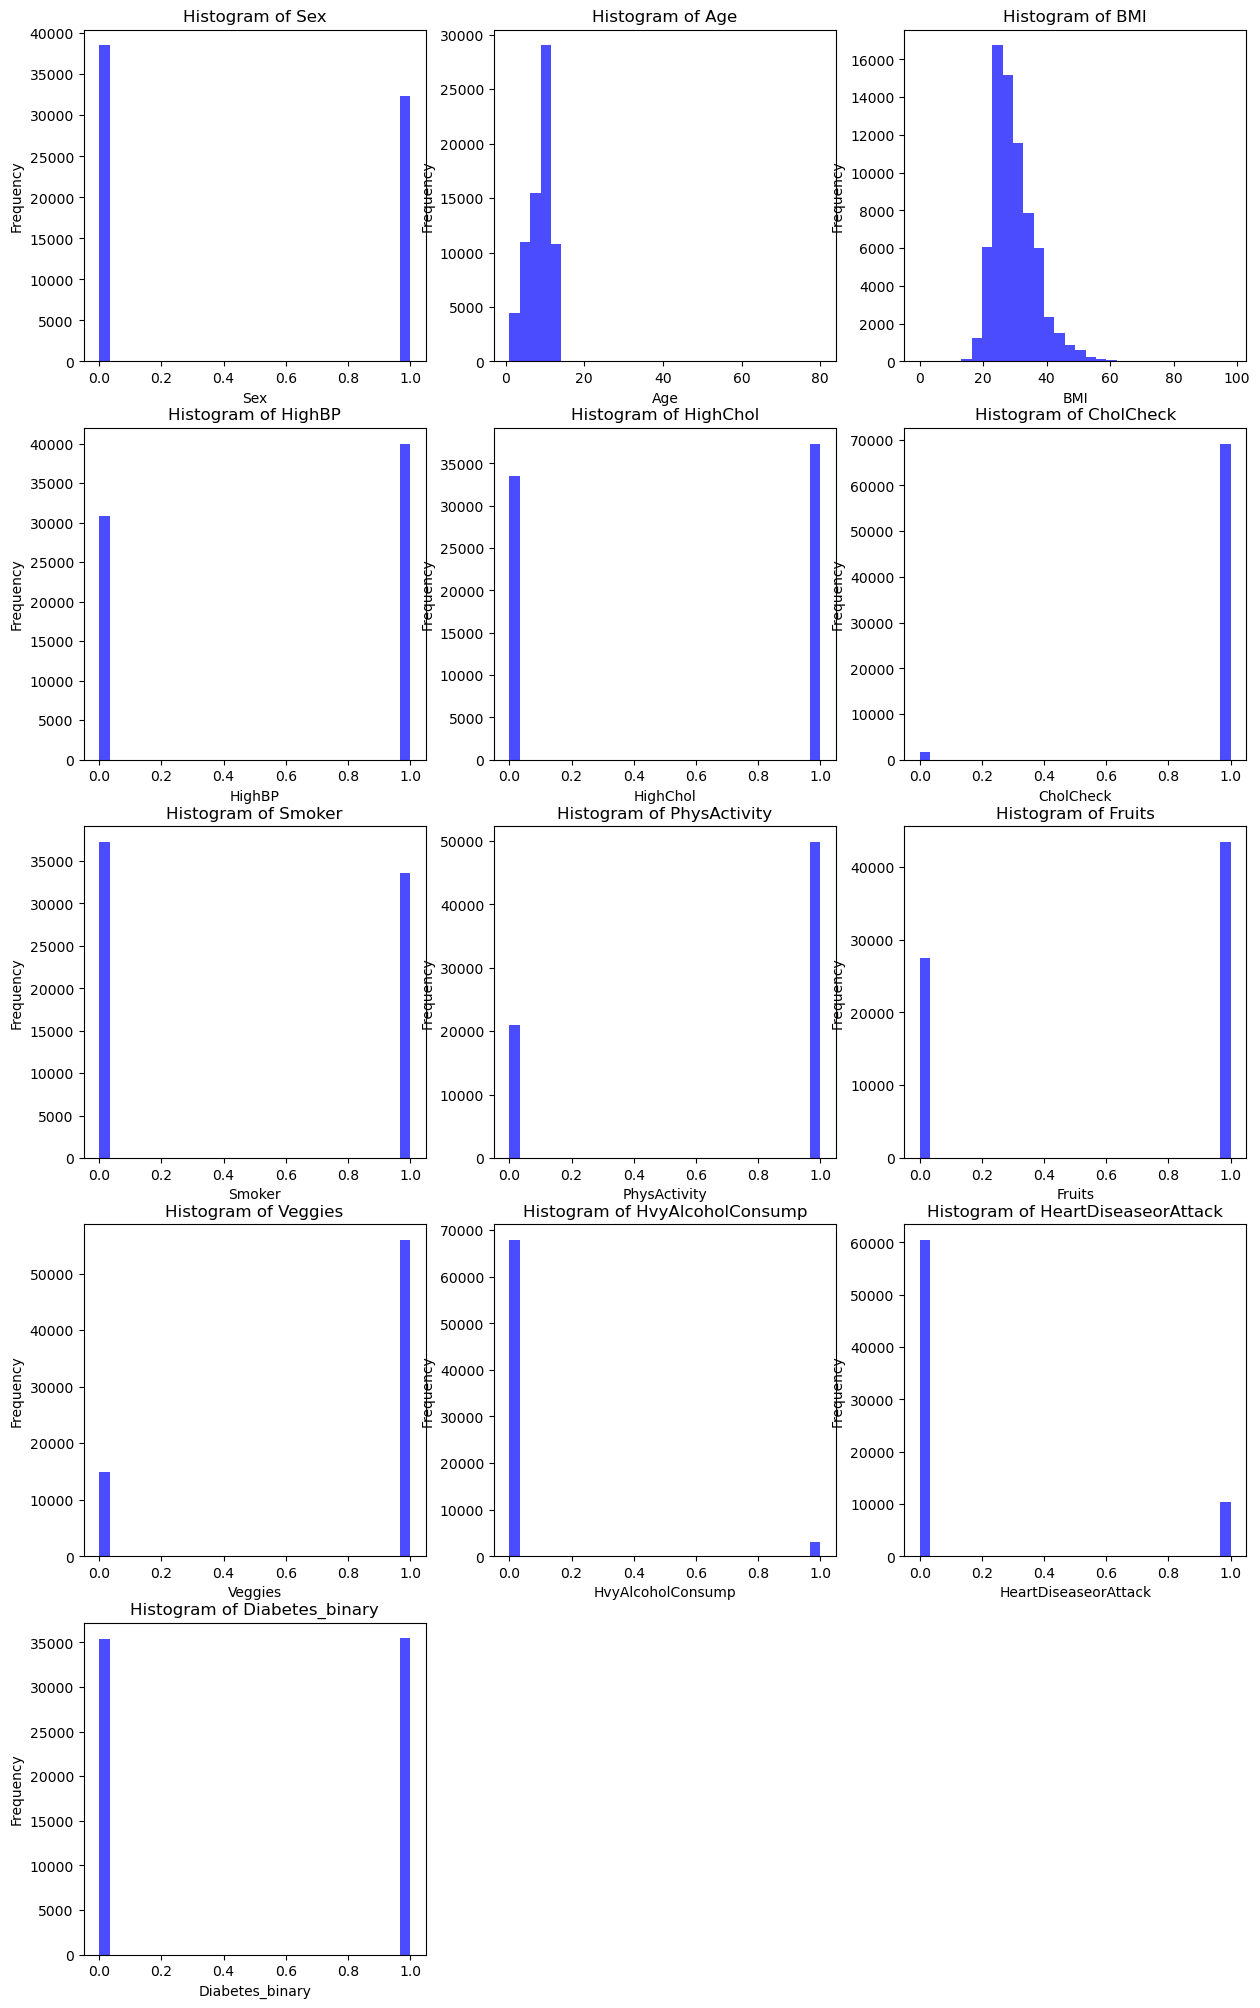

In [147]:
num_cols = df.select_dtypes(include='number').columns
n_cols = 3  # Number of columns in the subplot grid
n_rows = (len(num_cols) + n_cols - 1) // n_cols  # Calculate number of rows

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()  # Flatten the 2D array of axes

# Plot histograms for each numerical column
for i, col in enumerate(num_cols):
    axes[i].hist(df[col], bins=30, alpha=0.7, color='blue')
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')




These charts show information about different health factors in a group of people. The first chart shows the number of men and women in the group. The second chart shows the ages of the people - it looks like there are a lot of people in the middle age range.

The next few charts show things like body mass index (BMI), which is a measure of body fat, and how much alcohol people in the group consume. These factors can impact a person's health, especially when it comes to conditions like diabetes.

The most interesting chart is the one that shows the number of people with diabetes. This chart has a big peak, which means there are a lot of people in the group who have diabetes. Diabetes is a serious health condition that can cause other problems if it's not managed properly.

Overall, these charts give a snapshot of the health of the people in this group. They suggest that diabetes is a major concern that may need to be addressed through things like education, prevention, and better access to healthcare. Looking at all the different factors together can help us understand the health needs of this popquestions!

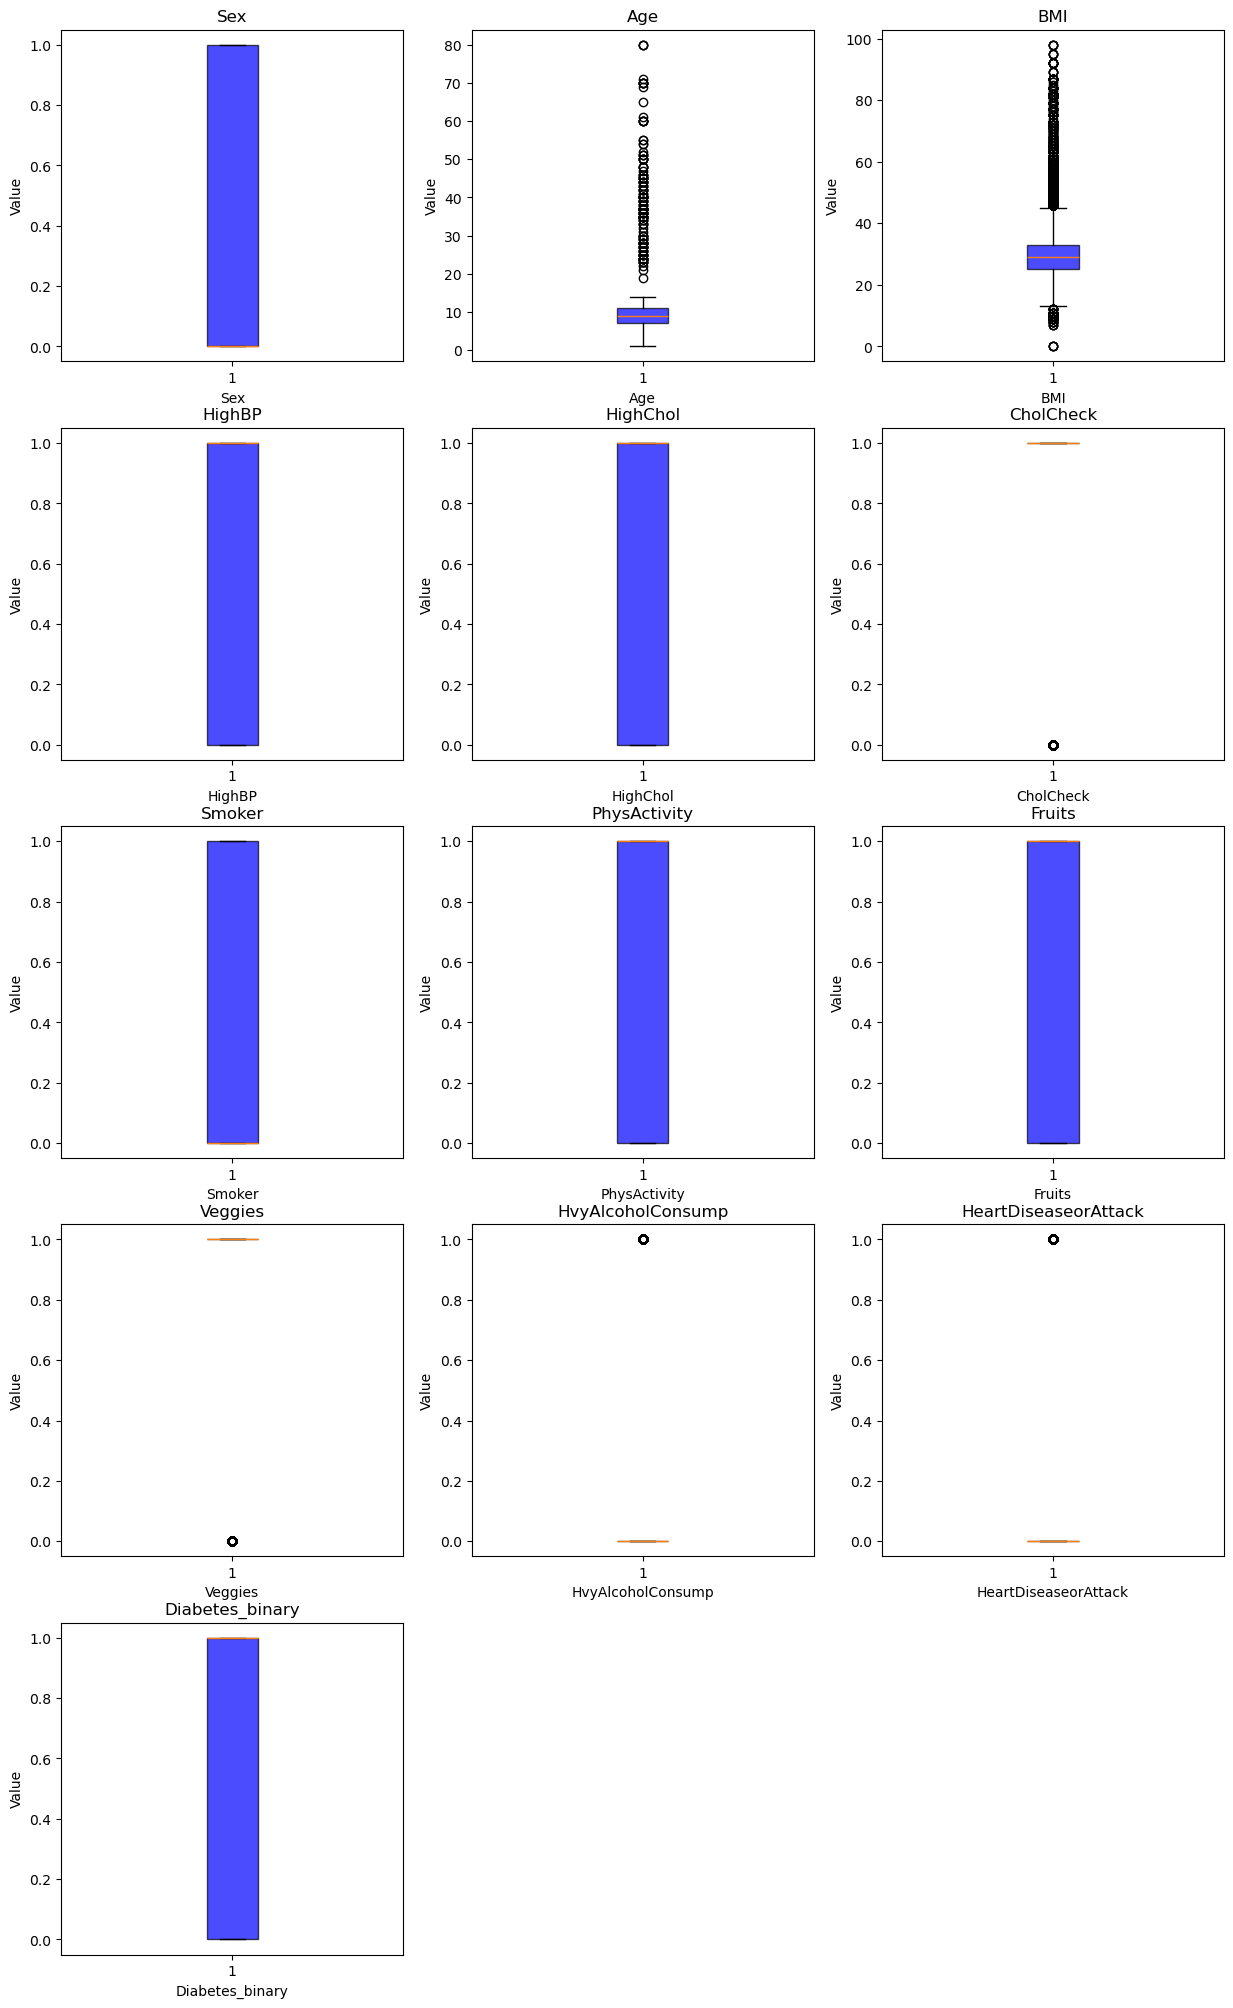

In [150]:
import matplotlib.pyplot as plt

num_cols = df.select_dtypes(include='number').columns
n_cols = 3  # Number of columns in the subplot grid
n_rows = (len(num_cols) + n_cols - 1) // n_cols  # Calculate number of rows

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()  # Flatten the 2D array of axes

# Plot box plots for each numerical column
for i, col in enumerate(num_cols):
    axes[i].boxplot(df[col], patch_artist=True, boxprops=dict(facecolor='blue', alpha=0.7))
    axes[i].set_title(f'{col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Value')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')


These charts provide a comprehensive overview of the health profile of the population, highlighting key factors such as the prevalence of diabetes, age distribution, and various other health indicators. The data suggests that diabetes is a significant concern, with a large portion of the population affected. Additionally, the charts reveal insights into factors like BMI, physical activity, and alcohol consumption, which can impact overall health and well-being.

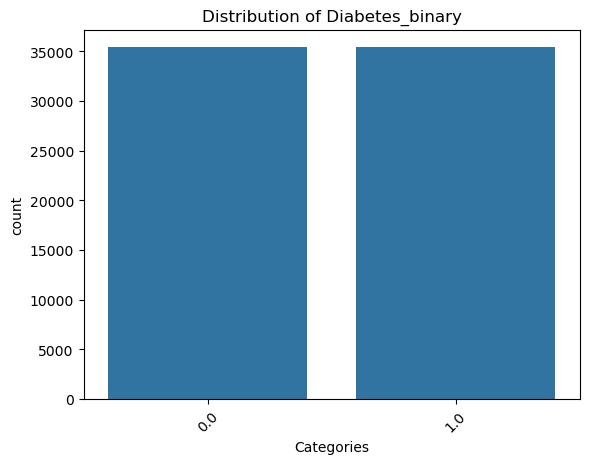

In [153]:
sns.countplot(data=df, x="Diabetes_binary")
plt.title("Distribution of Diabetes_binary")
plt.xlabel("Categories")
plt.ylabel("count")
plt.xticks(rotation=45)
plt.show()

<p>The chart shows the distribution of a binary diabetes variable in the dataset. The majority of the data points are classified as "Diabetes", indicating a higher prevalence of diabetes in the sample. The "Not Diabetes" category has a significantly lower count, suggesting that the dataset is focused on individuals with diabetes or at risk of developing the condition. This information could be useful for further analysis and understanding the characteristics of the diabetic population within the given data.</p>

In [156]:
# Computing and Visualizing the Descriptive Statistics
df.describe().T.astype(int)

,count,mean,std,min,25%,50%,75%,max
Sex,70843,0,0,0,0,0,1,1
Age,70843,8,3,1,7,9,11,80
BMI,70843,29,7,0,25,29,33,98
HighBP,70843,0,0,0,0,1,1,1
HighChol,70843,0,0,0,0,1,1,1
CholCheck,70843,0,0,0,1,1,1,1
Smoker,70843,0,0,0,0,0,1,1
PhysActivity,70843,0,0,0,0,1,1,1
Fruits,70843,0,0,0,0,1,1,1
Veggies,70843,0,0,0,1,1,1,1


#### Correlation Heatmap

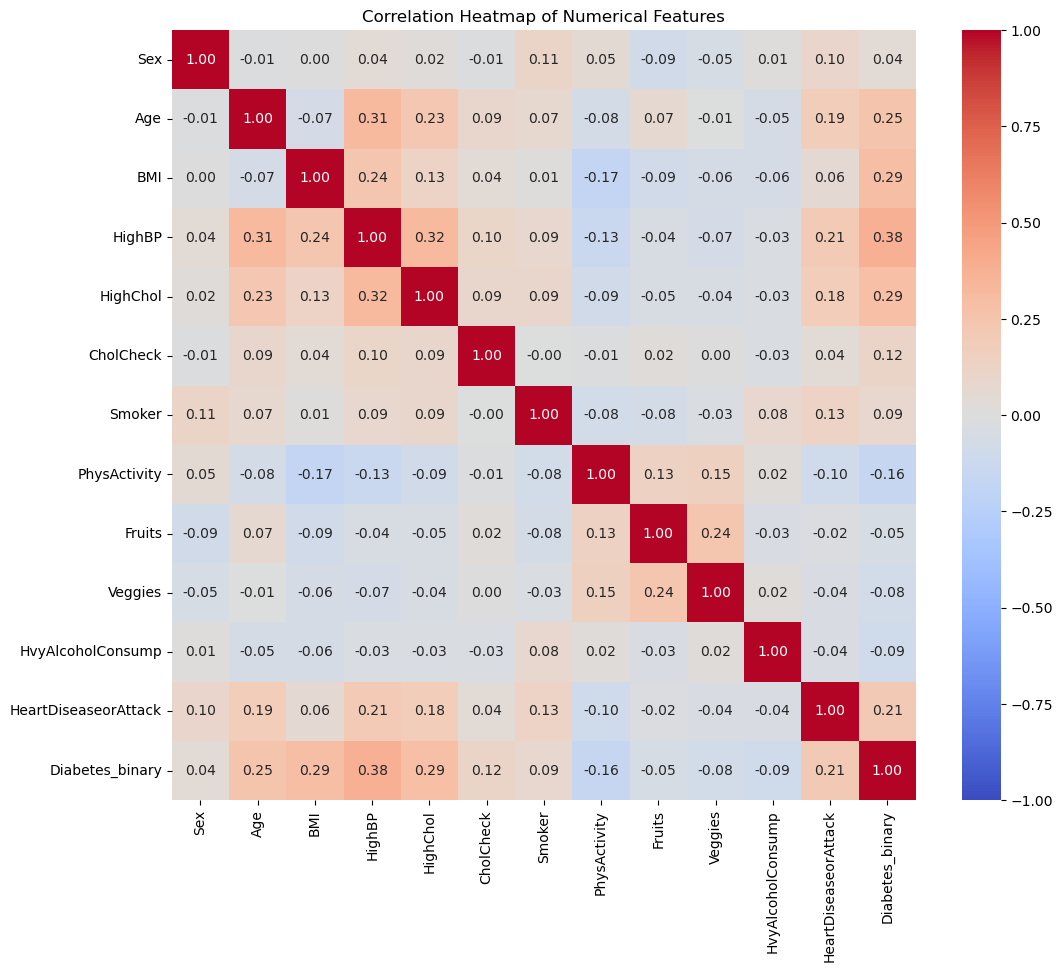

In [159]:
# Select only numerical columns for correlation analysis
num_cols = df.select_dtypes(include='number')

# Create a correlation matrix
corr_matrix = num_cols.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)

# Set title
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


<p>The correlation heatmap shows how different factors in the data are related to each other:</p>

<ul>
  <li>Factors like sex, body weight, blood pressure, and cholesterol levels are closely connected. When one of these goes up, the others tend to go up as well.</li>
  <li>Age, physical activity, and eating fruits and vegetables are moderately connected. As people get older or become more active, they may also eat more fruits and veggies.</li>
  <li>Physical activity has the opposite relationship with factors like body weight, cholesterol, alcohol use, and heart disease. When physical activity goes up, these other factors tend to go down, and vice versa.</li>
  <li>Smoking doesn't seem to be strongly connected to most of the other factors in the data. It's more independent of the other characteristics.</li>
</ul>

<p>These insights can help us understand the relationships between different health-related factors and guide further analysis and potential interventions to improve people's health.</p>
</ol>

#### Bivariate Analysis

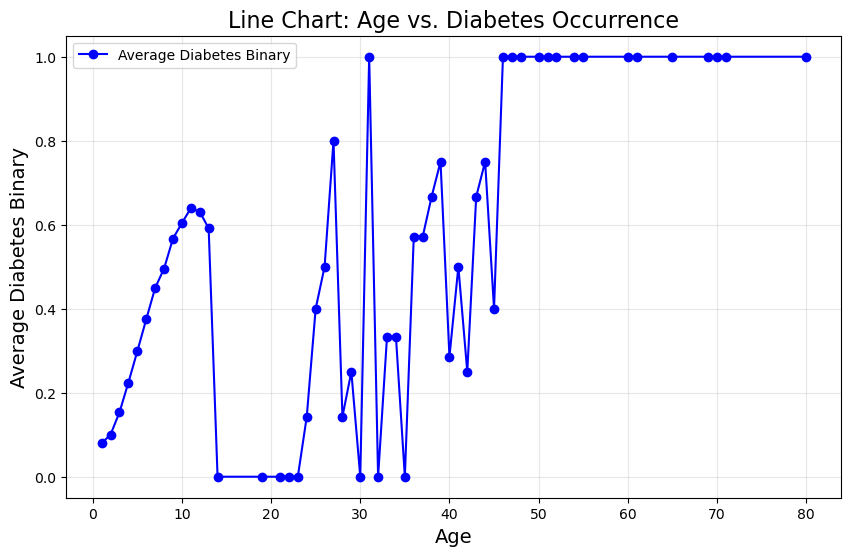

In [163]:
# Create a line chart to show the relationship between age and diabetes occurrence
age_diabetes_data = df.groupby('Age')['Diabetes_binary'].mean()

# Plot the line chart
plt.figure(figsize=(10, 6))
plt.plot(age_diabetes_data.index, age_diabetes_data.values, marker='o', color='blue', label='Average Diabetes Binary')

# Customize the plot
plt.title('Line Chart: Age vs. Diabetes Occurrence', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Average Diabetes Binary', fontsize=14)
plt.grid(alpha=0.3)
plt.legend()
plt.show()


The line chart shows a clear positive correlation between age and the average diabetes binary occurrence. The risk of diabetes starts low in younger ages, peaks around 40-50 years old, and remains high in older age groups. This pattern highlights the importance of targeted diabetes prevention and management strategies for the high-risk age ranges identified in the visualization.

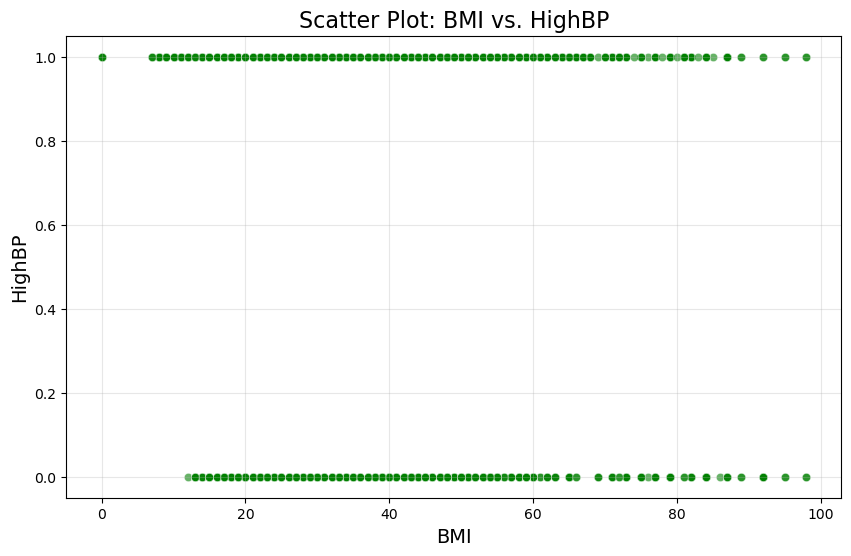

In [166]:
# Scatter plot for BMI and HighBP
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='BMI', y='HighBP', alpha=0.6, color='green')

# Customize the plot
plt.title('Scatter Plot: BMI vs. HighBP', fontsize=16)
plt.xlabel('BMI', fontsize=14)
plt.ylabel('HighBP', fontsize=14)
plt.grid(alpha=0.3)
plt.show()


The scatter plot shows the relationship between BMI (Body Mass Index) and HighBP (High Blood Pressure) for a group of individuals. Each dot on the plot represents an individual, with their BMI on the x-axis and their HighBP value on the y-axis.

The plot shows a generally positive correlation between BMI and HighBP, indicating that as BMI increases, the likelihood of having high blood pressure also tends to increase. However, the relationship is not perfectly linear, as there is some scatter and overlap in the data points.

The plot covers a wide range of BMI values, from around 20 to 100, and HighBP values, from around 0.0 to 1.0. The majority of the data points are clustered in the lower BMI and HighBP range, with fewer data points at the higher end of the spectrum.

Overall, this scatter plot provides a visual representation of the association between BMI and high blood pressure, which can be useful for understanding the potential health implications of excess weight and identifying individuals who may be at higher risk of hypertension.

In [169]:
# Select all numerical columns from the DataFrame
numerical_columns = df.select_dtypes(include='number').columns

# Calculate the correlation matrix for the selected numerical columns
corr_matrix = df[numerical_columns].corr()

# Display the correlation matrix
corr_matrix


,Sex,Age,BMI,HighBP,HighChol,CholCheck,Smoker,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,HeartDiseaseorAttack,Diabetes_binary
Sex,1.000000,-0.012953,0.003460,0.039824,0.016297,-0.008150,0.112904,0.050999,-0.089411,-0.053079,0.014371,0.098484,0.044293
Age,-0.012953,1.000000,-0.066768,0.314372,0.229980,0.092531,0.073189,-0.075239,0.069716,-0.006100,-0.054928,0.186287,0.250355
BMI,0.003460,-0.066768,1.000000,0.236864,0.127496,0.044921,0.014590,-0.172207,-0.086664,-0.057944,-0.057277,0.061430,0.292039
HighBP,0.039824,0.314372,0.236864,1.000000,0.317729,0.103494,0.085500,-0.134711,-0.039299,-0.065580,-0.027402,0.209757,0.380931
HighChol,0.016297,0.229980,0.127496,0.317729,1.000000,0.086219,0.091296,-0.089012,-0.045696,-0.041737,-0.025845,0.180137,0.288774
CholCheck,-0.008150,0.092531,0.044921,0.103494,0.086219,1.000000,-0.004649,-0.008025,0.017642,0.000525,-0.027216,0.043347,0.115280
Smoker,0.112904,0.073189,0.014590,0.085500,0.091296,-0.004649,1.000000,-0.081027,-0.076301,-0.030937,0.078184,0.125118,0.085677
PhysActivity,0.050999,-0.075239,-0.172207,-0.134711,-0.089012,-0.008025,-0.081027,1.000000,0.134765,0.149929,0.018809,-0.098738,-0.158324
Fruits,-0.089411,0.069716,-0.086664,-0.039299,-0.045696,0.017642,-0.076301,0.134765,1.000000,0.239254,-0.033580,-0.020126,-0.053859
Veggies,-0.053079,-0.006100,-0.057944,-0.065580,-0.041737,0.000525,-0.030937,0.149929,0.239254,1.000000,0.021850,-0.036757,-0.079106


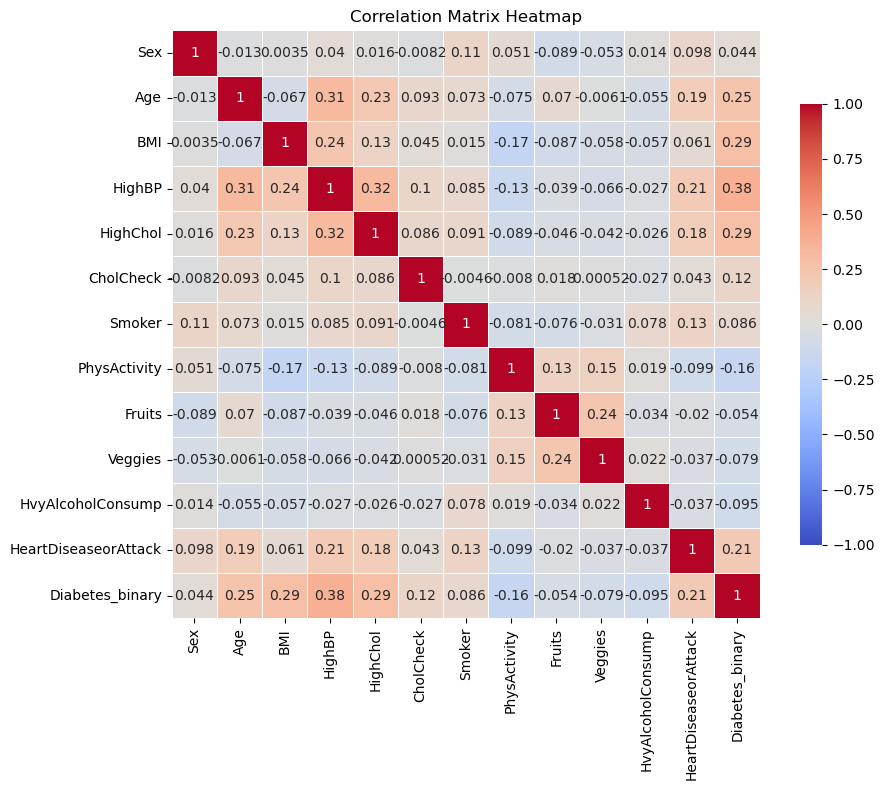

In [171]:
# Plot the heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.75})

plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

#### Key Insight

1. The variable "Diabetes_binary" has a moderate positive correlation with BMI (0.29) and HighBP (0.38), indicating that higher BMI and blood pressure levels are associated with an increased risk of diabetes.

2. This suggests that factors like excess weight and hypertension may be important risk factors for developing diabetes in this population.

3. The correlation between Diabetes_binary and other lifestyle factors like Smoker, PhysActivity, Fruits, and Veggies is relatively weak, implying these variables may not be as strongly linked to diabetes risk compared to BMI and blood preategies.pact.

#### Multivariate Analysis

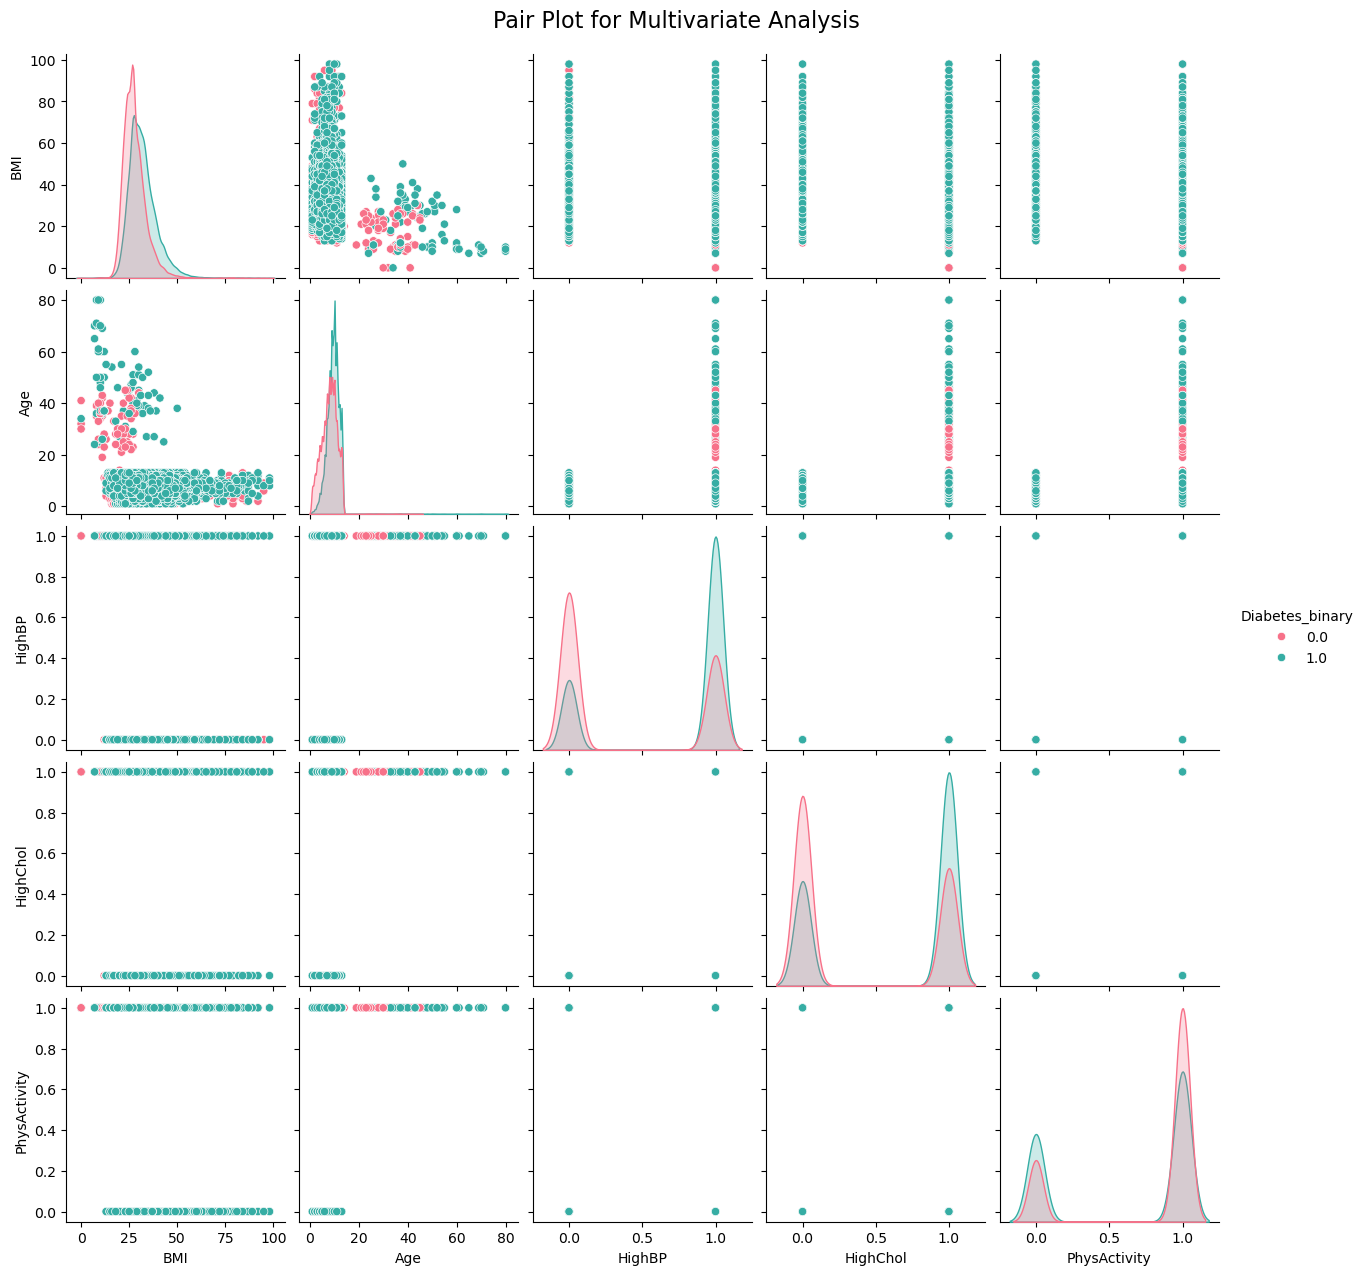

In [175]:
# Selecting relevant columns for multivariate analysis
columns = ['BMI', 'Age', 'HighBP', 'HighChol', 'PhysActivity', 'Diabetes_binary']

# Create a pair plot
sns.pairplot(df[columns], hue='Diabetes_binary', diag_kind='kde', palette='husl')

plt.suptitle('Pair Plot for Multivariate Analysis', y=1.02, fontsize=16)
plt.show()


The pair plot for the multivariate analysis provides several key insights:

1. Diabetes_binary vs BMI: There is a clear positive relationship between BMI and the binary diabetes variable. Individuals with higher BMI values tend to have a higher likelihood of having diabetes.

2. Diabetes_binary vs Age: The plot shows a moderately positive correlation between age and diabetes risk. Older individuals generally have a higher prevalence of diabetes compared to younger ones.

3. Diabetes_binary vs HighBP: The plot indicates a positive association between high blood pressure (HighBP) and the diabetes binary variable. Individuals with higher blood pressure levels are more likely to have diabetes.

4. Diabetes_binary vs HighChol: The relationship between high cholesterol (HighChol) and diabetes risk appears to be relatively weak, with a less pronounced pattern compared to the other variables.

5. Diabetes_binary vs PhysActivity: The plot suggests a negative correlation between physical activity (PhysActivity) and diabetes risk. More physically active individuals tend to have a lower likelihood of having diabetes.

These insights highlight the importance of factors like BMI, age, blood pressure, and physical activity in understanding the risk and prevalence of diabetes in the studied population. The analysis provides a comprehensive view of the multivariate relationships between these variables and the binary diabetes outcome.and care.

#### Principle Component Analysis

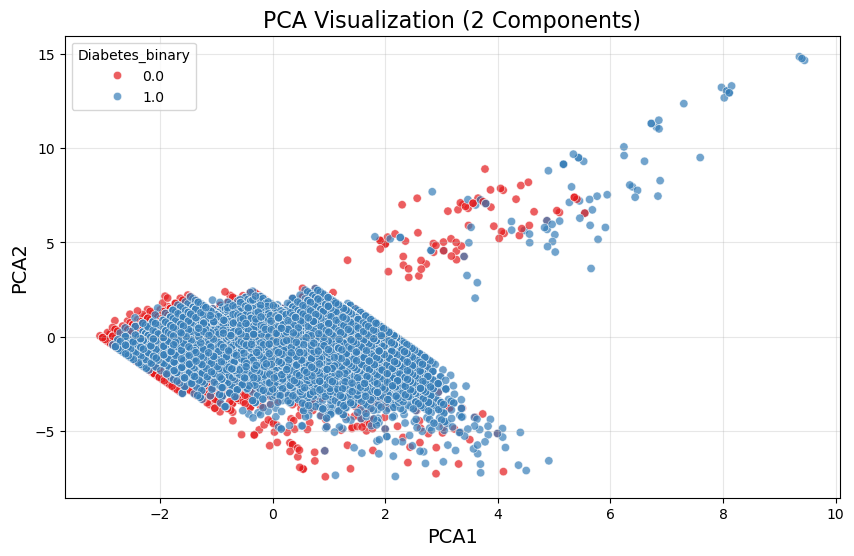

In [178]:
from sklearn.decomposition import PCA

# Selecting numerical features for PCA
numerical_columns = ['BMI', 'Age', 'HighBP', 'HighChol', 'PhysActivity']

# Standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[numerical_columns])

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Add PCA results to the DataFrame
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

# Plot PCA results
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Diabetes_binary', palette='Set1', alpha=0.7)

plt.title('PCA Visualization (2 Components)', fontsize=16)
plt.xlabel('PCA1', fontsize=14)
plt.ylabel('PCA2', fontsize=14)
plt.grid(alpha=0.3)
plt.show()



This image shows a plot that helps us understand the differences between people with diabetes and people without diabetes. The plot uses a special way of looking at the data called "Principal Component Analysis" or PCA for short.

Imagine you have a bunch of information about people, like their age, weight, blood pressure, and other health factors. The PCA plot takes all of that information and finds the two most important factors that can best explain the differences between the people with diabetes and the people without diabetes.

In this plot, you can see that the people with diabetes (shown as red dots) are mostly grouped together on the right side of the plot. This means they share similar characteristics that are different from the people without diabetes (shown as blue dots), who are more spread out.

The horizontal axis (called PCA1) seems to be the most important factor in separating the two groups. This means the first factor, which could be a combination of things like age, weight, and blood pressure, is really good at telling us who has diabetes and who doesn't.

The vertical axis (called PCA2) also helps a bit in separating the groups, but not as much as the first factor.

So, in simple terms, this plot is showing us that there are certain key factors that can help identify people who are more likely to have diabetes, versus those who are less likely. This information can be very useful for doctors and researchers trying to understand and prevent diabetes.